# STAT 301 Group Assignment - Planning Stage
**Type**: Individual Assignment <br>
**Group 72 members**: Shivani Aggarwal, Tina Yu, Anthony Leong, Brian Ni <br> 
**TA**: Yian Lin

## Data Description
### Airbnb Prices in European Cities
This dataset provides information about Airbnb listings and their prices in 10 popular European cities - Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna. The listing prices are attributed to several characteristics such as room types, cleanliness and satisfaction ratings, number of bedrooms, and so on. Each city has two .csv files - for weekdays and weekends each.

The dataset includes the variables as shown in the table below: 

| Variable | Description | Type |
| -------- | ----------- | ---- |
|`realSum`| The total price of the Airbnb listing| Numeric|
|`room_type`| The type of room being offered (private, shared, etc.)| Categorical|
|`room_shared`|	Whether the room is shared or not| Boolean|
|`room_private`| Whether the room is private or not| Boolean|
|`person_capacity`|	The maximum number of people that can stay in the room| Numeric|
|`host_is_superhost`|Whether the host is a superhost or not | Boolean|
|`multi`|	Whether the listing is for multiple rooms or not | Boolean|
|`biz`|	Whether the listing is for business purposes or not |Boolean|
|`cleanliness_rating`|	The cleanliness rating of the listing |Numeric|
|`guest_satisfaction_overall`|	The overall guest satisfaction rating of the listing | Numeric|
|`bedrooms`|	The number of bedrooms in the listing |Numeric|
|`dist`|	The distance from the city centre |Numeric|
|`metro_dist`|	The distance from the nearest metro station |Numeric|
|`atrr_index`| Attraction index: scale to 100 | Numeric|
|`atrr_index_norm`| Normalized attraction index: scale to 100 | Numeric|
|`rest_index`| Restaurant index: scale to 100 | Numeric|
|`rest_index_norm`| Normalized Restaurant index: scale to 100 | Numeric|
|`lng`|	The longitude of the listing |Numeric|
|`lat`|	The latitude of the listing |Numeric|

For the purpose of this assignment, we will use weekdays and weekends data from only 3 cities - Budapest, London, and Rome. This warrants the relevance of 6 .csv files with different number of observations. Below is a list of the observations in each file.
- `budapest_weekdays.csv`: 2074
- `budapest_weekends.csv`: 1948
- `london_weekdays.csv`: 4614
- `london_weekends.csv`: 5379
- `rome_weekdays.csv`: 4492
- `rome_weekends.csv`: 4535

This dataset is scraped off of a bigger dataset published in the article "Determinants of Airbnb prices in European cities:  A spatial econometrics approach" ([DOI link](https://doi.org/10.1016/j.tourman.2021.104319)) authored by Kristóf Gyódi and Łukasz1 Nawaro and published on January 13, 2021

## Question
a) In which city do Airbnb prices increase more on weekends from weekdays?

This question will infer the differences in prices, `realSum`, on weekdays and weekends, `week`, for different cities, `city`, using a model with interaction. We would require other control variables to isolate the confounding effects of lurking variables on price. We will determine the variables to be used in the model by building a correlation matrix.
<br>

b) This regression model is focussed on inference as we are testing whether the relationship of prices with the days of the week across cities is statistically significant.

## Exploratory Data Analysis and Visualization
### Reading in the data and wrangling it
Since the data is scattered across 6 .csv files, we will read in all of the files and combine them into one dataset with all the information. We will do so by adding two columns:
- `city` which stores the values of the cities, and
- `week` which stores the value of 1 for weekends and 0 for weekdays.

We will also remove the variable `X` which is a unique identifier for each listing in each dataset.

In [102]:
library(tidyverse)
library(repr)
library(broom)
install.packages("arm")
library(arm)
library(ggplot2)
library(stats)


The downloaded binary packages are in
	/var/folders/j5/xd6t99yn7q979grv_gc_5cg80000gn/T//RtmpGjiGbp/downloaded_packages


In [137]:
##Creating the list of path file in folder
Nameoffile <- list.files(path = "../input/airbnb-prices-in-european-cities", pattern = ".csv", all.files = TRUE,
                         full.names = TRUE) 
# Get list of name of city and time
Nameofcity_data_temp <- Nameoffile %>% str_replace(".csv", "")
Nameofcity_data <- Nameofcity_data_temp %>% str_replace("../input/airbnb-prices-in-european-cities/","")
city_time <- strsplit(Nameofcity_data[1],split = "_")
read_temp <- read.csv(Nameoffile[1])

ERROR: Error in file(file, "rt"): invalid 'description' argument


In [8]:
bud_wd <- read.csv("data/budapest_weekdays.csv")
bud_wd <- bud_wd  %>% 
    mutate(city = "Budapest",
          week = 0) 

bud_we <- read.csv("data/budapest_weekends.csv")
bud_we <- bud_we  %>% 
    mutate(city = "Budapest",
          week = 1)    

lon_wd <- read.csv("data/london_weekdays.csv")
lon_wd <- lon_wd  %>% 
    mutate(city = "London",
          week = 0) 

lon_we <- read.csv("data/london_weekends.csv")
lon_we <- lon_we  %>% 
    mutate(city = "London",
          week = 1)  

rom_wd <- read.csv("data/rome_weekdays.csv")
rom_wd <- rom_wd  %>% 
    mutate(city = "Rome",
          week = 0)

rom_we <- read.csv("data/rome_weekends.csv")
rom_we <- rom_we  %>% 
    mutate(city = "Rome",
          week = 1)  

In [9]:
airbnb <- rbind(bud_wd, bud_we, lon_wd, lon_we, rom_wd, rom_we)  %>% 
    dplyr::select(-X)

head(airbnb)
tail(airbnb)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,⋯,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,238.9905,Entire home/apt,False,False,6,True,0,1,10,99,⋯,0.3593550,0.3526430,404.4047,24.116552,893.4773,67.65685,19.05074,47.50076,Budapest,0
2,300.7943,Entire home/apt,False,False,6,False,0,1,9,98,⋯,0.9294272,0.2002355,1676.8760,100.000000,452.5397,34.26770,19.04493,47.50405,Budapest,0
3,162.3819,Entire home/apt,False,False,4,True,0,0,10,98,⋯,2.4508403,0.2794518,163.5885,9.755551,191.9923,14.53825,19.02170,47.49882,Budapest,0
4,118.4377,Entire home/apt,False,False,2,False,0,0,9,92,⋯,1.5594494,0.4779711,191.7198,11.433155,326.2156,24.70205,19.06301,47.51126,Budapest,0
5,134.4174,Entire home/apt,False,False,4,True,1,0,10,99,⋯,1.1138030,0.2701016,198.6035,11.843658,635.5159,48.12322,19.06900,47.49900,Budapest,0
6,127.3676,Entire home/apt,False,False,4,False,1,0,9,91,⋯,0.2684703,0.1669317,635.6350,37.905903,1005.6535,76.15118,19.05480,47.50094,Budapest,0


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,⋯,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
23037,270.4977,Entire home/apt,False,False,4,True,1,0,10,98,⋯,3.229875,0.4863988,531.8492,11.78335,1324.4773,28.85715,12.46433,41.90743,Rome,1
23038,413.8125,Entire home/apt,False,False,4,False,0,1,10,97,⋯,1.933569,0.2705916,657.3071,14.56293,1408.4076,30.68579,12.48137,41.90860,Rome,1
23039,582.3767,Entire home/apt,False,False,6,True,0,1,10,96,⋯,3.124166,1.9395050,540.3414,11.97150,1985.4354,43.25782,12.46700,41.89100,Rome,1
23040,878.5916,Entire home/apt,False,False,6,True,1,0,10,99,⋯,2.759242,1.1953387,759.3691,16.82416,1783.2686,38.85310,12.46900,41.90100,Rome,1
23041,447.2448,Entire home/apt,False,False,4,True,1,0,10,98,⋯,1.641598,0.8588370,1125.8572,24.94387,1687.8958,36.77516,12.48342,41.89634,Rome,1
23042,265.8219,Entire home/apt,False,False,6,False,0,1,10,96,⋯,4.411877,0.3524935,167.7019,3.71551,467.3403,10.18221,12.53000,41.86700,Rome,1


In [10]:
str(airbnb)

'data.frame':	23042 obs. of  21 variables:
 $ realSum                   : num  239 301 162 118 134 ...
 $ room_type                 : chr  "Entire home/apt" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ room_shared               : chr  "False" "False" "False" "False" ...
 $ room_private              : chr  "False" "False" "False" "False" ...
 $ person_capacity           : num  6 6 4 2 4 4 4 4 6 4 ...
 $ host_is_superhost         : chr  "True" "False" "True" "False" ...
 $ multi                     : int  0 0 0 0 1 1 0 0 0 0 ...
 $ biz                       : int  1 1 0 0 0 0 0 1 1 0 ...
 $ cleanliness_rating        : num  10 9 10 9 10 9 6 9 10 10 ...
 $ guest_satisfaction_overall: num  99 98 98 92 99 91 80 92 88 96 ...
 $ bedrooms                  : int  1 2 1 1 2 2 2 1 2 1 ...
 $ dist                      : num  0.359 0.929 2.451 1.559 1.114 ...
 $ metro_dist                : num  0.353 0.2 0.279 0.478 0.27 ...
 $ attr_index                : num  404 1677 164 192 199 ..

### Visualization
xx

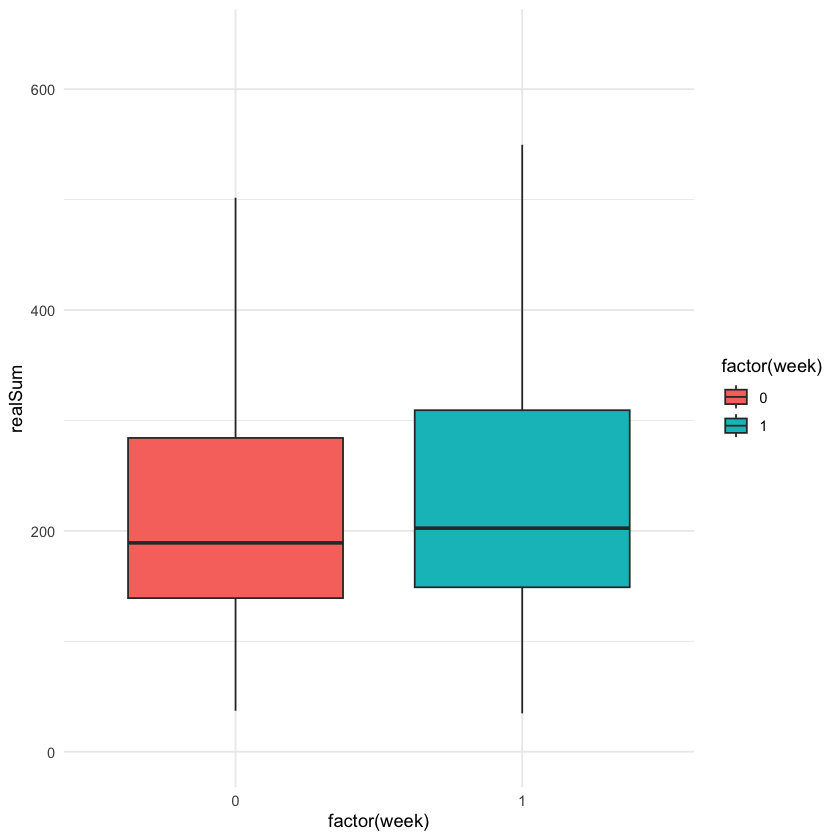

In [75]:
ggplot(airbnb) +
geom_boxplot(aes(x = factor(week), y = realSum, fill = factor(week)), outlier.shape = NA) +

coord_cartesian(ylim = c(0, quantile(airbnb$realSum, 0.95))) +
theme_minimal()

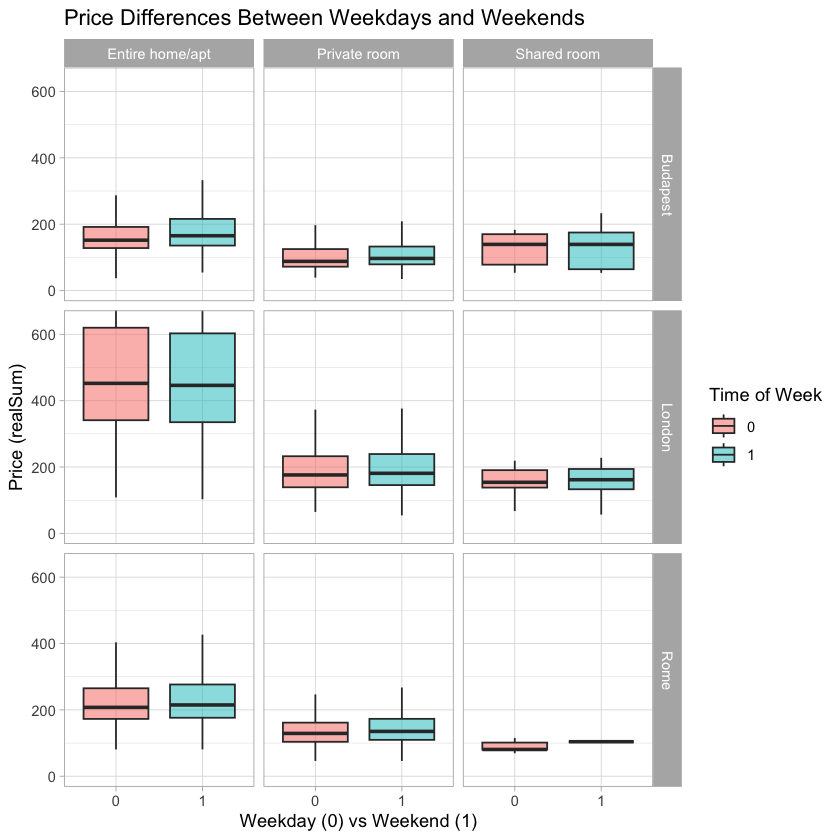

In [79]:
ggplot(airbnb, aes(x = factor(week), y = realSum, fill = factor(week))) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +
  facet_grid(city ~ room_type) + # Facet by room type (rows) and city (columns)
  labs(title = "Price Differences Between Weekdays and Weekends",
       x = "Weekday (0) vs Weekend (1)",
       y = "Price (realSum)",
       fill = "Time of Week") +
  coord_cartesian(ylim = c(0, quantile(airbnb$realSum, 0.95))) + # Remove extreme outliers
  theme_light()

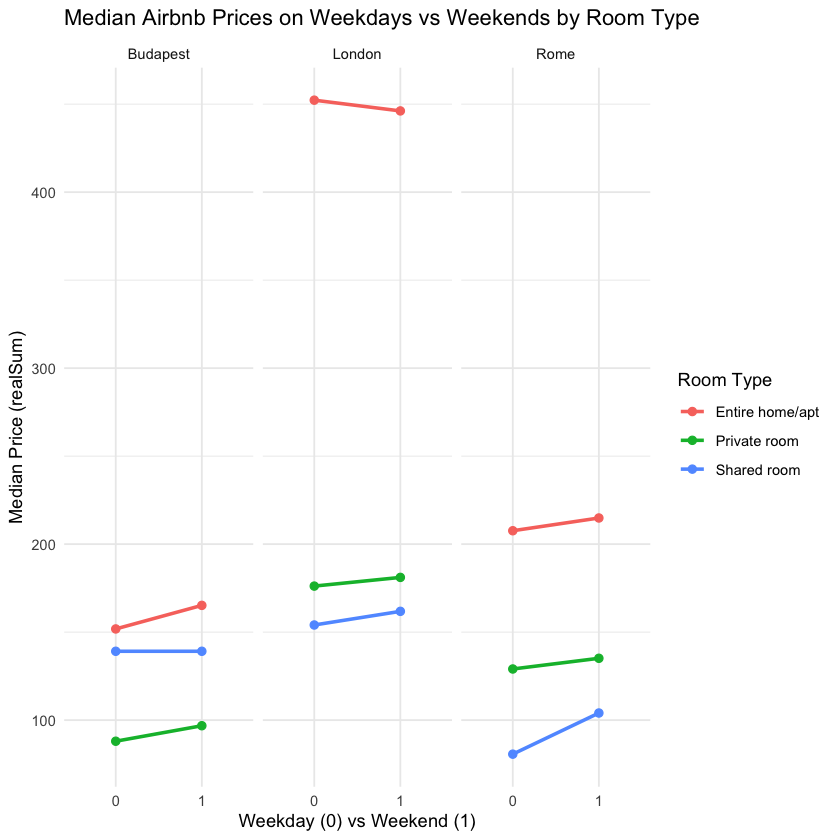

In [98]:
bnb_summary <- airbnb %>%
  group_by(city, week, room_type) %>%
  summarise(median_price = median(realSum), .groups = "drop")

ggplot(bnb_summary, aes(x = factor(week), y = median_price, color = room_type, group = room_type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  facet_wrap(~ city) +
  labs(title = "Median Airbnb Prices on Weekdays vs Weekends by Room Type",
       x = "Weekday (0) vs Weekend (1)",
       y = "Median Price (realSum)",
       color = "Room Type") +
  theme_minimal()

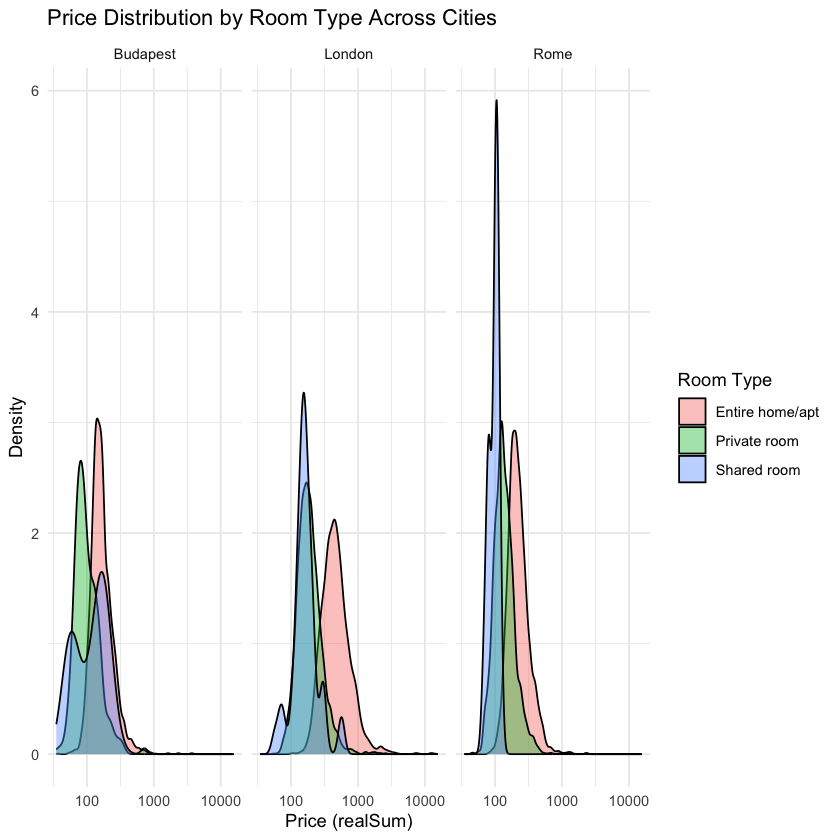

In [82]:
ggplot(airbnb, aes(x = realSum, fill = room_type)) +
  geom_density(alpha = 0.4) +
  facet_wrap(~ city) +
  scale_x_log10() +  # Log scale to handle skewed prices
  labs(title = "Price Distribution by Room Type Across Cities",
       x = "Price (realSum)",
       y = "Density",
       fill = "Room Type") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


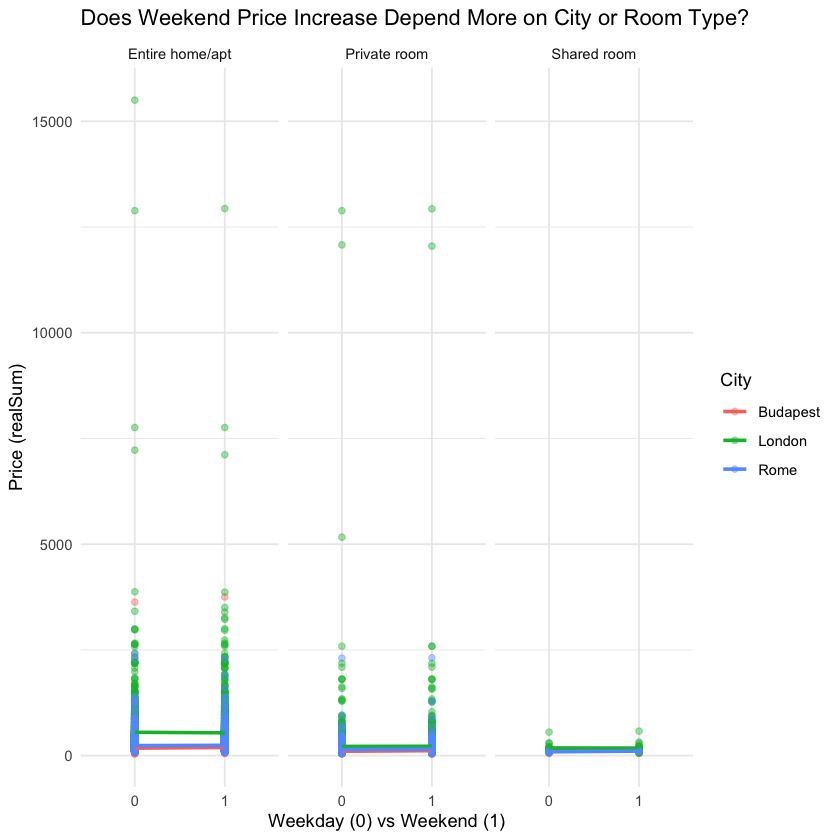

In [84]:
ggplot(airbnb, aes(x = factor(week), y = realSum, color = city, group = interaction(city, room_type))) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ room_type) +
  labs(title = "Does Weekend Price Increase Depend More on City or Room Type?",
       x = "Weekday (0) vs Weekend (1)",
       y = "Price (realSum)",
       color = "City") +
  theme_minimal()

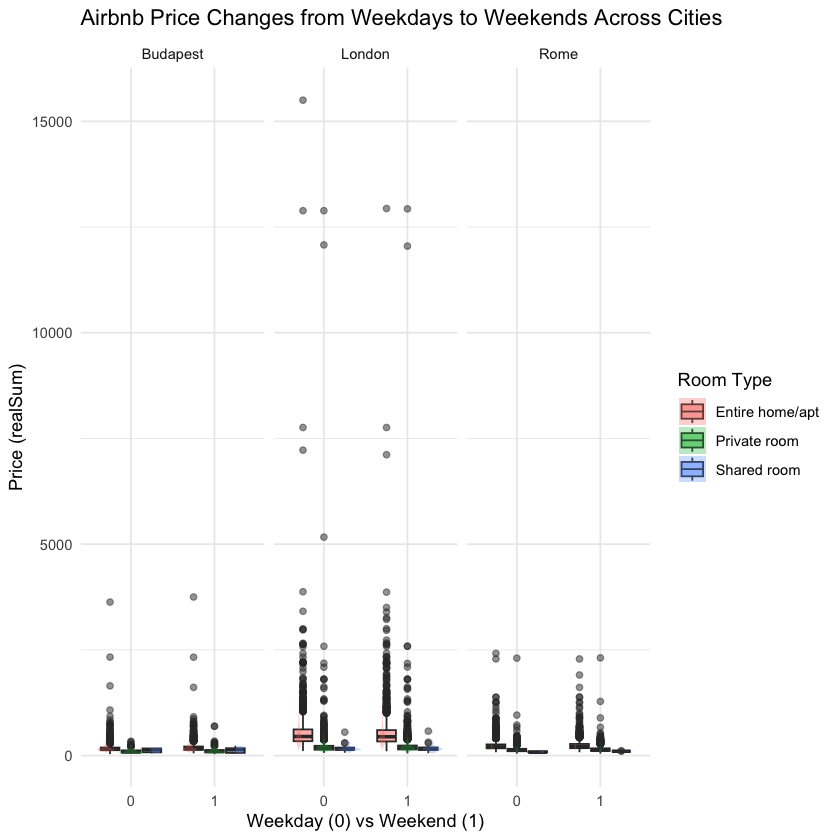

In [24]:
ggplot(airbnb, aes(x = factor(week), y = realSum, fill = room_type)) +
  geom_boxplot(alpha = 0.5) +
  geom_violin(alpha = 0.3, color = NA) + 
  facet_wrap(~ city) +
  labs(title = "Airbnb Price Changes from Weekdays to Weekends Across Cities",
       x = "Weekday (0) vs Weekend (1)", 
       y = "Price (realSum)", 
       fill = "Room Type") +
  theme_minimal()

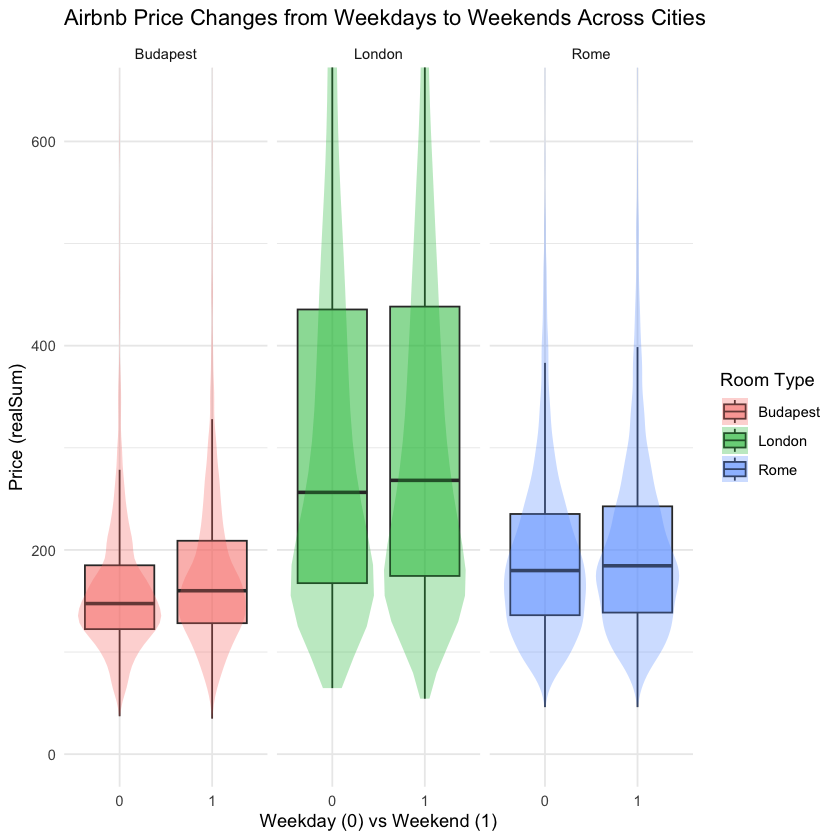

In [95]:
ggplot(airbnb, aes(x = factor(week), y = realSum, fill = city)) +
  geom_boxplot(alpha = 0.5, outlier.shape = NA) +  # Hide outliers in boxplot
  geom_violin(alpha = 0.3, color = NA) + 
  facet_wrap( ~ city) +
  labs(title = "Airbnb Price Changes from Weekdays to Weekends Across Cities",
       x = "Weekday (0) vs Weekend (1)", 
       y = "Price (realSum)", 
       fill = "Room Type") +
  coord_cartesian(ylim = c(0, quantile(airbnb$realSum, 0.95))) + # Zoom into 95% of data
  theme_minimal()

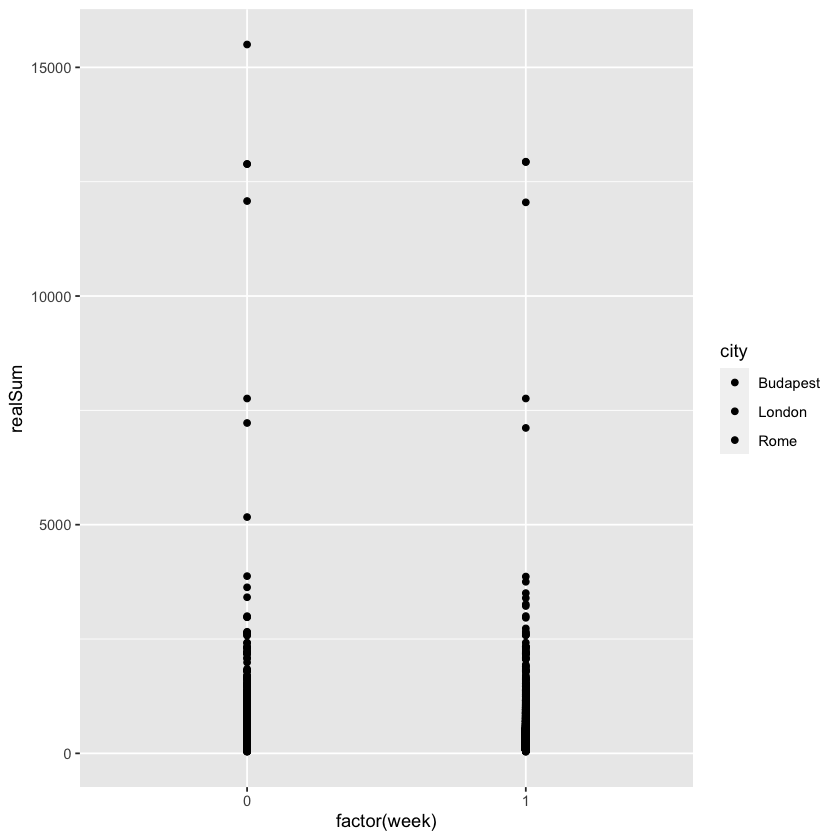

In [23]:
plot <- airbnb  %>% 
ggplot() + 
geom_point(aes(x = factor(week), y = realSum, fill = city))
plot

biz,mean,median
<int>,<dbl>,<dbl>
0,5.959206,5.698007
1,4.459402,4.198001


[1] -0.272374

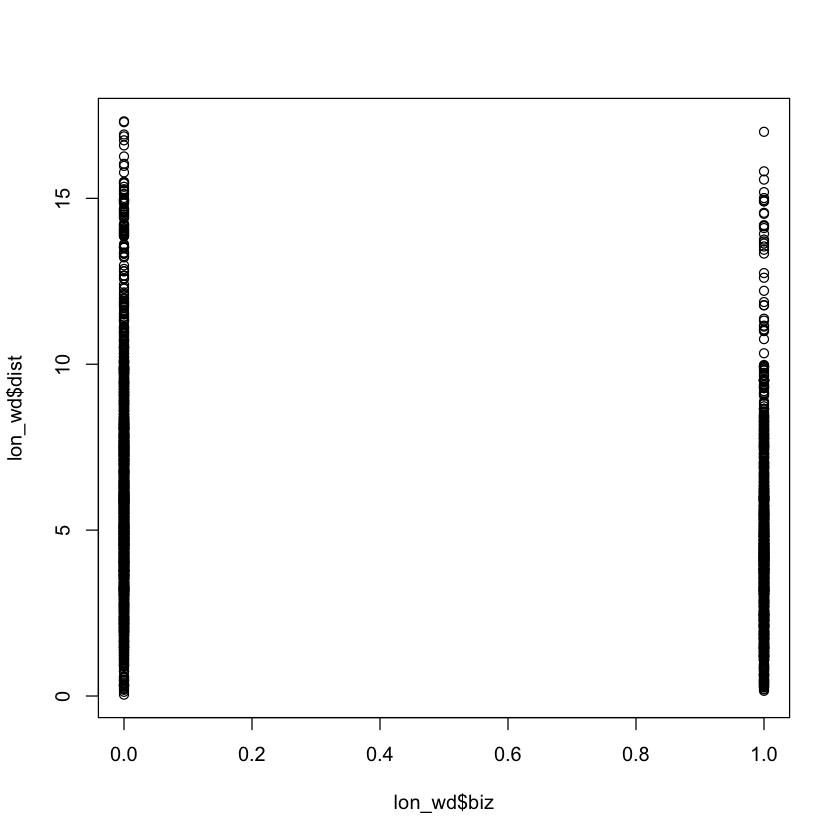

In [3]:
plot(lon_wd$biz, lon_wd$dist)
lon_wd %>% group_by(biz)  %>% summarize(mean = mean(dist), median = median(dist))
cor(lon_wd$biz, lon_wd$dist)

definitely bedroom and price
price by proximity to city centre and room type 
guest rating and price
business rentals have higher prices on average
weekdays and prices


In [106]:
model <- lm(realSum ~ week * city + room_type + bedrooms + dist + biz, data = airbnb)
tidy_model <- tidy(model)
tidy_model

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),91.21428,8.0519940,11.328161,1.140522e-29
week,19.69916,9.3816533,2.099754,3.576137e-02
cityLondon,348.48592,8.6502715,40.286125,0.000000e+00
cityRome,93.47707,8.0522807,11.608770,4.539474e-31
room_typePrivate room,-158.97889,4.3567701,-36.490080,1.835770e-283
room_typeShared room,-173.21754,34.2658114,-5.055113,4.334307e-07
bedrooms,119.95307,3.4430222,34.839472,3.238962e-259
dist,-24.49437,0.9202451,-26.617228,9.073599e-154
biz,17.67881,4.2108177,4.198427,2.697845e-05


In [113]:
model2 <- tidy(lm(realSum ~ week + city , data = airbnb))
model2

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),172.799830,5.509452,31.364247,1.728579e-211
week,7.667646,4.272394,1.794695,7.271537e-02
cityLondon,185.542110,6.051351,30.661271,2.166693e-202
cityRome,28.740034,6.139595,4.681096,2.869687e-06


In [118]:
model3 <- tidy(lm(realSum ~ bedrooms + dist + room_type + guest_satisfaction_overall, data = airbnb))
model3

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),317.280024,21.1609089,14.993686,1.399219e-50
bedrooms,118.553359,3.6819520,32.198508,1.570584e-222
dist,1.128207,0.8425864,1.338981,1.805902e-01
room_typePrivate room,-109.370329,4.5446406,-24.065782,2.073578e-126
room_typeShared room,-142.613106,36.8925961,-3.865629,1.111070e-04
guest_satisfaction_overall,-1.580785,0.2211870,-7.146826,9.145450e-13


In [129]:
airbnb$biz_factor <- as.factor(airbnb$biz)
airbnb$super_factor <- as.factor(airbnb$host_is_superhost)

In [133]:
model4 <- tidy(lm(guest_satisfaction_overall ~ cleanliness_rating + realSum + super_factor + biz_factor + city, data = airbnb))
model4

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),31.2981326210,0.4238609034,73.840575,0.000000e+00
cleanliness_rating,6.6940045171,0.0436572002,153.331054,0.000000e+00
realSum,0.0001568765,0.0001277751,1.227754,2.195518e-01
super_factorTrue,1.5322066796,0.0997688317,15.357569,5.770040e-53
biz_factor1,-2.1864640475,0.0879688029,-24.854994,1.354149e-134
cityLondon,-1.5201035591,0.1215409411,-12.506926,8.942619e-36
cityRome,-1.6693873420,0.1190176412,-14.026386,1.639174e-44


In [136]:
model_5 <- tidy(glm(guest_satisfaction_overall ~ cleanliness_rating + realSum + 
                    super_factor + biz_factor + city, 
                    data = airbnb, 
                    family = "poisson"),
               exponentiate = TRUE)
model_5

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),43.4450790,7.879314e-03,478.6581073,0.000000e+00
cleanliness_rating,1.0855671,8.127632e-04,101.0165396,0.000000e+00
realSum,1.0000007,2.141435e-06,0.3498304,7.264659e-01
super_factorTrue,1.0131832,1.632431e-03,8.0230488,1.031523e-15
biz_factor1,0.9781241,1.473671e-03,-15.0092383,6.387701e-51
cityLondon,0.9839265,2.007286e-03,-8.0726184,6.880638e-16
cityRome,0.9820143,1.957492e-03,-9.2717618,1.830962e-20
